In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Explorativní analýza

V této části je provedena analýza dat z datasetu a jsou zde vykresleny grafy popisující vztahy vybraných atributů. Dále se zde nachází způsoby detekce odlehlých hodnot a vyhledání chybějících hodnot. Posledním tématem této části je korelační matice.

In [2]:
# načtení datasetu
df = pd.read_csv("spotify-2023.csv", delimiter=",", encoding="ISO-8859-1")

In [3]:
# zobrazení datasetu
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Analýza atributů

Typy a hodnoty atributů, počet hodnot, rozsahy, nejčastější hodnoty

In [4]:
# celkový počet hodnot
print(f"Celkem záznamů: {df.shape[0]}, počet atributů: {df.shape[1]}, celkem hodnot: {df.shape[0] * df.shape[1]}")

Celkem záznamů: 953, počet atributů: 24, celkem hodnot: 22872


In [5]:
# výpis atributů a jejich typů
print("Názvy a typy atributů:")
# oprava hodnot - aby bylo možno pracovat s grafy
df["streams"] = pd.to_numeric(df["streams"], errors='coerce').fillna(0).astype(int) # filtrace špatných hodnot a převod do numerické reprezentace
df["in_shazam_charts"] = df["in_shazam_charts"].str.replace(',', '').fillna(0).astype(int) # smazání , u tisíců
df["in_deezer_playlists"] = df["in_deezer_playlists"].str.replace(",","") # smazání , u tisíců
df["in_deezer_playlists"]= df["in_deezer_playlists"].astype(int)
df.dtypes

Názvy a typy atributů:


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

U numerických atributů nás budou zajímat nejčastější hodnoty a rozsahy hodnot

In [6]:
num_df = df.select_dtypes(include="number") # vytvoření dataframu s pouze numerickými atributy
print(f"Počet numerických atributů: {num_df.shape[1]}")

print("Popisné statistiky jednotlivých atributů:")
num_df.describe()

Počet numerických atributů: 20
Popisné statistiky jednotlivých atributů:


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.135979e+08,67.812172,51.908709,385.187828,2.666317,56.847849,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668039e+08,86.441493,50.630241,1130.535561,6.035599,157.441749,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.413817e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.902286e+08,34.000000,38.000000,44.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,164.000000,2.000000,33.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [7]:
print("Nejčastější hodnoty:")
num_df.median().astype("int")

Nejčastější hodnoty:


artist_count                    1
released_year                2022
released_month                  6
released_day                   13
in_spotify_playlists         2224
in_spotify_charts               3
streams                 290228626
in_apple_playlists             34
in_apple_charts                38
in_deezer_playlists            44
in_deezer_charts                0
in_shazam_charts                2
bpm                           121
danceability_%                 69
valence_%                      51
energy_%                       66
acousticness_%                 18
instrumentalness_%              0
liveness_%                     12
speechiness_%                   6
dtype: int64

### Rozložení hodnot atributů

Rozložení hodnot atributů pomocí grafů

In [8]:
num_df.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,141381703,43,263,45,10,826,125,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,55,58,72,11,0,11,15
4,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,65,23,80,14,63,11,6


#### Graf 1 - Počet písní v závislosti na měsíci vydání

Použitý graf: sloupcový (bar)

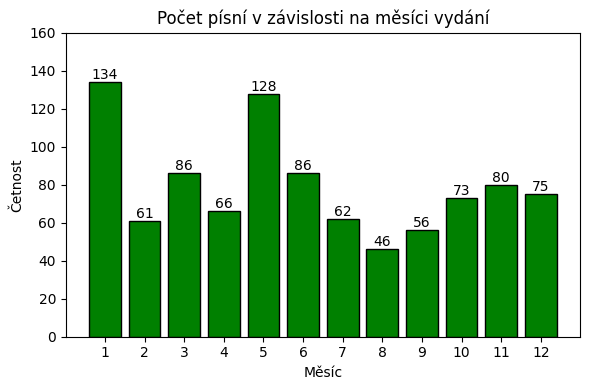

In [9]:
fig, ax = plt.subplots(figsize = (6,4))
x = np.linspace(1,12,12)
bars = ax.bar(x, num_df["released_month"].value_counts().sort_index(), color='g', edgecolor='black', tick_label=x.astype("int"))
ax.set_ylabel("Četnost")
ax.set_xlabel("Měsíc")
ax.set_ylim((0, 160))
ax.bar_label(bars)
ax.set_title("Počet písní v závislosti na měsíci vydání")
plt.tight_layout()


#### Graf 2 - Počet písní v závislosti na dni vydání

Použitý graf: sloupcový (bar)

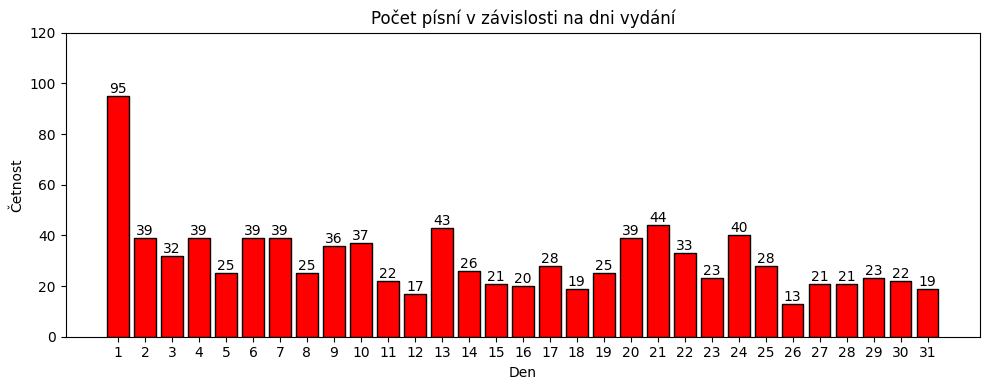

In [10]:
fig, ax = plt.subplots(figsize = (10,4))
x = np.linspace(1,31,31)
bars = ax.bar(x, num_df["released_day"].value_counts().sort_index(), color='r', edgecolor='black', tick_label=x.astype("int"))
ax.set_ylabel("Četnost")
ax.set_xlabel("Den")
ax.set_ylim((0, 120))
ax.bar_label(bars)
ax.set_title("Počet písní v závislosti na dni vydání")
plt.tight_layout()

#### Graf 3 - Vztah tónu (key) a procent energie (energy_%) písně

Použitý graf: krabicový (boxplot)

['B' 'C#' 'F' 'A' 'D' 'F#' 'G#' 'G' 'E' 'A#' 'D#']


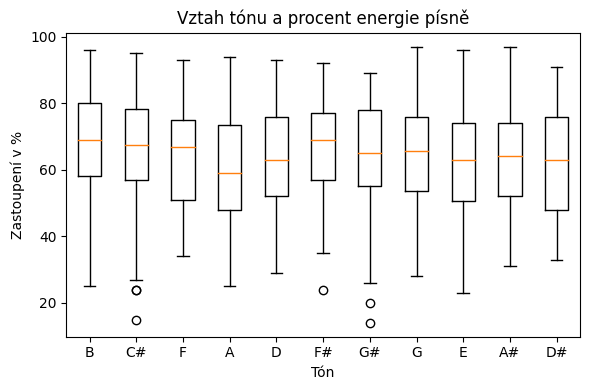

In [11]:
fig, ax = plt.subplots(figsize = (6,4))

x=[]
keys = df["key"].dropna().unique() # vyhození NaN hodnot
for k in keys:
    x.append(df.loc[df["key"] == k, "energy_%"])

ax.boxplot(x)

ax.set_ylabel("Zastoupení v %")
ax.set_xlabel("Tón")
ax.set_xticklabels(keys)

ax.set_title("Vztah tónu a procent energie písně")
plt.tight_layout()
print(keys)

#### Graf 4 - Vztah tónu a procent akustičnosti písně

Použitý graf: krabicový (boxplot)

['B' 'C#' 'F' 'A' 'D' 'F#' 'G#' 'G' 'E' 'A#' 'D#']


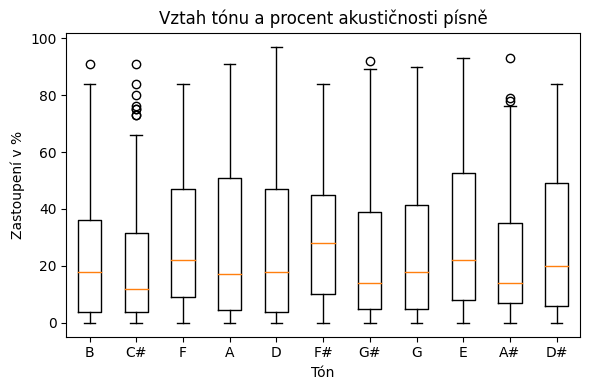

In [12]:
fig, ax = plt.subplots(figsize = (6,4))

x=[]
keys = df["key"].dropna().unique() # vyhození NaN hodnot
for k in keys:
    x.append(df.loc[df["key"] == k, "acousticness_%"])

ax.boxplot(x)

ax.set_ylabel("Zastoupení v %")
ax.set_xlabel("Tón")
ax.set_xticklabels(keys)

ax.set_title("Vztah tónu a procent akustičnosti písně")
plt.tight_layout()
print(keys)

#### Graf 5 - Zastoupení písní dle data vydání (1.1. až 31.12.)

Použitý graf: teplotní (heatmap)

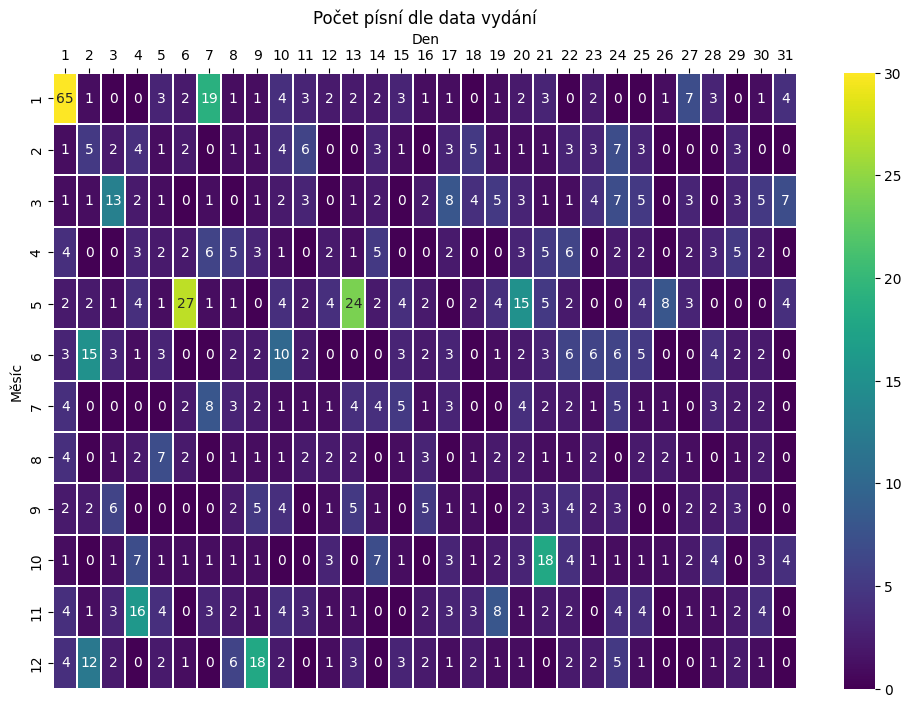

In [13]:
fig, ax = plt.subplots(figsize=(12,8)) 
df2 = df[["released_month", "released_day"]]
# pivotace tabulky 
heatmap_data = pd.pivot_table(df2, index="released_month", columns="released_day", aggfunc=len, fill_value=0)
# omezení hodnot 0-30 pro lepší vizualizaci čísel okolo 20
sns.heatmap(heatmap_data, cmap="viridis", annot=True, linewidths=0.1, ax=ax, vmin=0, vmax=30)
ax.set_ylabel("Měsíc")
ax.set_xlabel("Den")
ax.set_title("Počet písní dle data vydání")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

#### Graf 6 - Nejposlouchanější písničky roku 2023 na Spotify podle počtu přehrání (TOP 25)

Použitý graf: sloupcový (barplot)

[Text(0, 0, '3.70 mld.'),
 Text(0, 0, '3.56 mld.'),
 Text(0, 0, '2.89 mld.'),
 Text(0, 0, '2.86 mld.'),
 Text(0, 0, '2.81 mld.'),
 Text(0, 0, '2.71 mld.'),
 Text(0, 0, '2.67 mld.'),
 Text(0, 0, '2.59 mld.'),
 Text(0, 0, '2.59 mld.'),
 Text(0, 0, '2.57 mld.'),
 Text(0, 0, '2.56 mld.'),
 Text(0, 0, '2.56 mld.'),
 Text(0, 0, '2.51 mld.'),
 Text(0, 0, '2.48 mld.'),
 Text(0, 0, '2.42 mld.'),
 Text(0, 0, '2.36 mld.'),
 Text(0, 0, '2.32 mld.'),
 Text(0, 0, '2.30 mld.'),
 Text(0, 0, '2.29 mld.'),
 Text(0, 0, '2.28 mld.'),
 Text(0, 0, '2.28 mld.'),
 Text(0, 0, '2.24 mld.'),
 Text(0, 0, '2.20 mld.'),
 Text(0, 0, '2.20 mld.'),
 Text(0, 0, '2.16 mld.')]

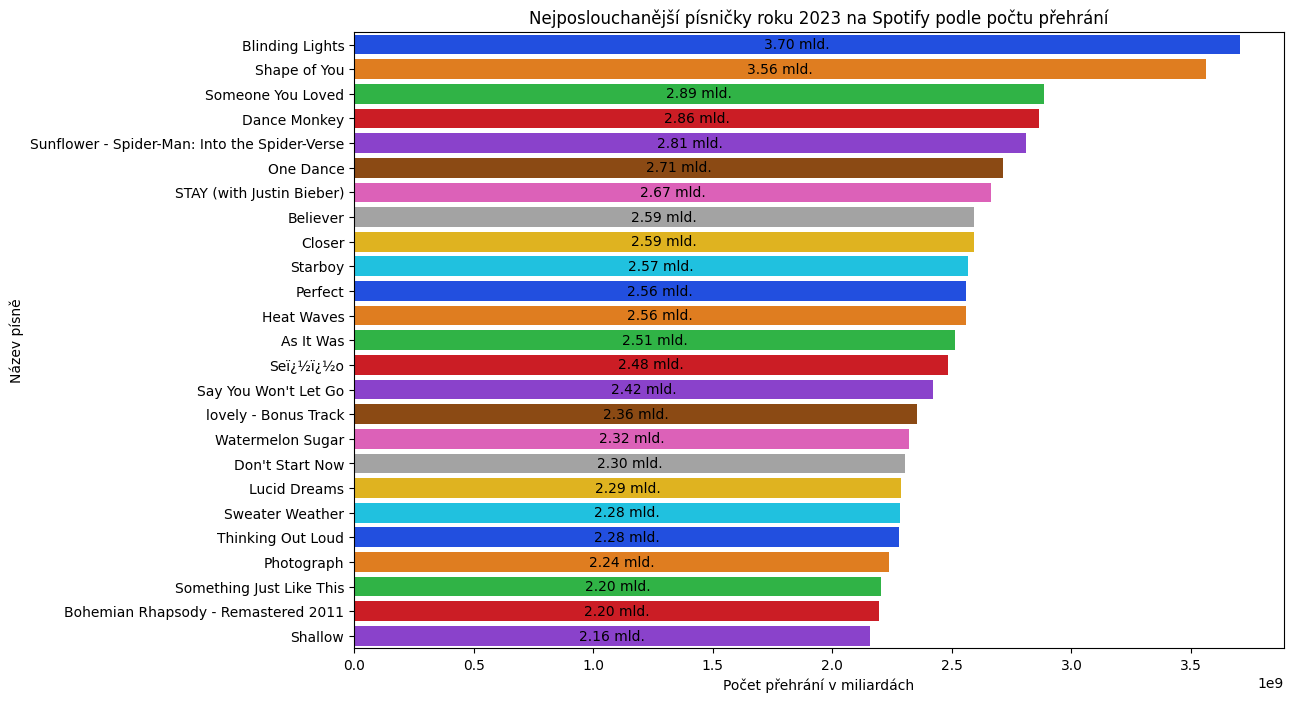

In [14]:
fig, ax = plt.subplots(figsize=(12,8)) 
# výběr TOP 25 
top_streams = df.sort_values(by="streams", ascending=False).head(25)

ax = sns.barplot(x="streams", y="track_name", data = top_streams, ax=ax, palette="bright")

ax.set_ylabel("Název písně")
ax.set_xlabel("Počet přehrání v miliardách")
ax.set_title("Nejposlouchanější písničky roku 2023 na Spotify podle počtu přehrání")
# číslo uvnitř řádku
ax.bar_label(ax.containers[0], labels = [f'{x.get_width() / 10e8:.2f} mld.' for x in ax.containers[0]] , label_type="center")


#### Graf 7 - Písničky uložené v nejvíce playlistech na Spotify (TOP 25)

Použitý graf: sloupcový (barplot)

[Text(0, 0, '52898'),
 Text(0, 0, '51979'),
 Text(0, 0, '50887'),
 Text(0, 0, '49991'),
 Text(0, 0, '44927'),
 Text(0, 0, '43899'),
 Text(0, 0, '43257'),
 Text(0, 0, '42798'),
 Text(0, 0, '41751'),
 Text(0, 0, '41231'),
 Text(0, 0, '40112'),
 Text(0, 0, '36843'),
 Text(0, 0, '36724'),
 Text(0, 0, '35684'),
 Text(0, 0, '33966'),
 Text(0, 0, '33898'),
 Text(0, 0, '33783'),
 Text(0, 0, '33206'),
 Text(0, 0, '33032'),
 Text(0, 0, '32502'),
 Text(0, 0, '32181'),
 Text(0, 0, '31762'),
 Text(0, 0, '31358'),
 Text(0, 0, '31123'),
 Text(0, 0, '30992')]

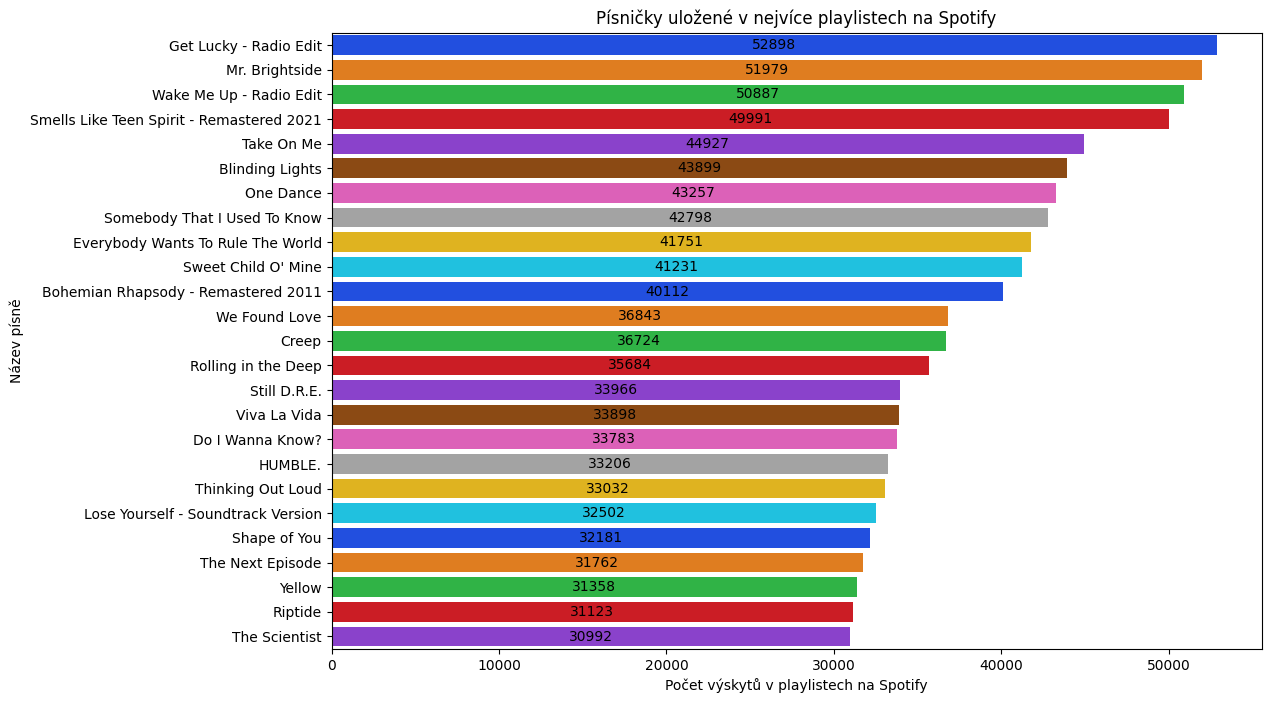

In [15]:
fig, ax = plt.subplots(figsize=(12,8)) 
# TOP 25
top_pl = df.sort_values(by="in_spotify_playlists", ascending=False).head(25)

ax = sns.barplot(x="in_spotify_playlists", y="track_name", data = top_pl, ax=ax, palette="bright")

ax.set_ylabel("Název písně")
ax.set_xlabel("Počet výskytů v playlistech na Spotify")
ax.set_title("Písničky uložené v nejvíce playlistech na Spotify")

ax.bar_label(ax.containers[0], labels = [f'{int(x.get_width())}' for x in ax.containers[0]] , label_type="center")

#### Graf 8 - Písničky uložené v nejvíce playlistech v Apple Music (TOP 25)

Použitý graf: sloupcový (barplot)

[Text(0, 0, '672'),
 Text(0, 0, '537'),
 Text(0, 0, '533'),
 Text(0, 0, '532'),
 Text(0, 0, '492'),
 Text(0, 0, '453'),
 Text(0, 0, '440'),
 Text(0, 0, '437'),
 Text(0, 0, '433'),
 Text(0, 0, '403'),
 Text(0, 0, '391'),
 Text(0, 0, '387'),
 Text(0, 0, '386'),
 Text(0, 0, '384'),
 Text(0, 0, '382'),
 Text(0, 0, '372'),
 Text(0, 0, '368'),
 Text(0, 0, '363'),
 Text(0, 0, '344'),
 Text(0, 0, '336'),
 Text(0, 0, '328'),
 Text(0, 0, '321'),
 Text(0, 0, '321'),
 Text(0, 0, '315'),
 Text(0, 0, '315')]

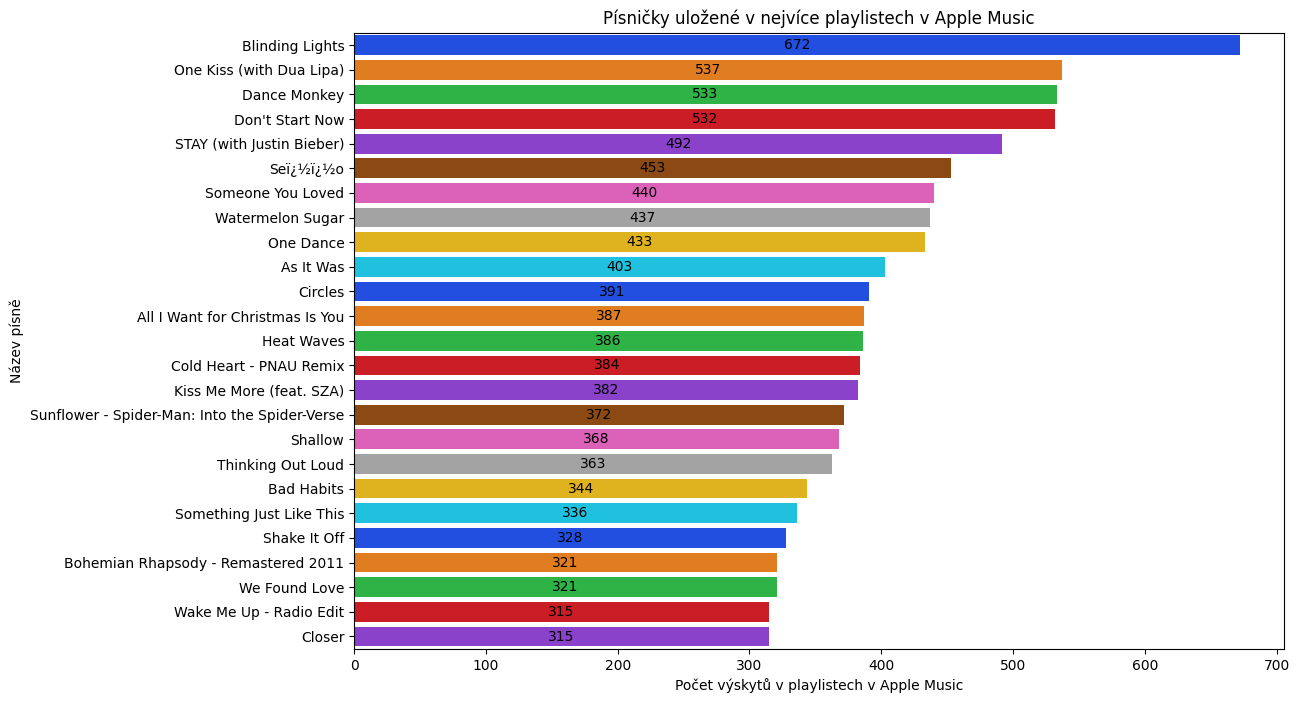

In [16]:
fig, ax = plt.subplots(figsize=(12,8)) 

top_apple = df.sort_values(by="in_apple_playlists", ascending=False).head(25)

ax = sns.barplot(x="in_apple_playlists", y="track_name", data = top_apple, ax=ax, palette="bright")

ax.set_ylabel("Název písně")
ax.set_xlabel("Počet výskytů v playlistech v Apple Music")
ax.set_title("Písničky uložené v nejvíce playlistech v Apple Music")

ax.bar_label(ax.containers[0], labels = [f'{int(x.get_width())}' for x in ax.containers[0]] , label_type="center")

#### Graf 9 - Vztah rytmu, tanečnosti a energie

Použitý graf: bodový (relplot) 

Text(0.5, 0.98, 'Vztah rytmu, tanečnosti a energie')

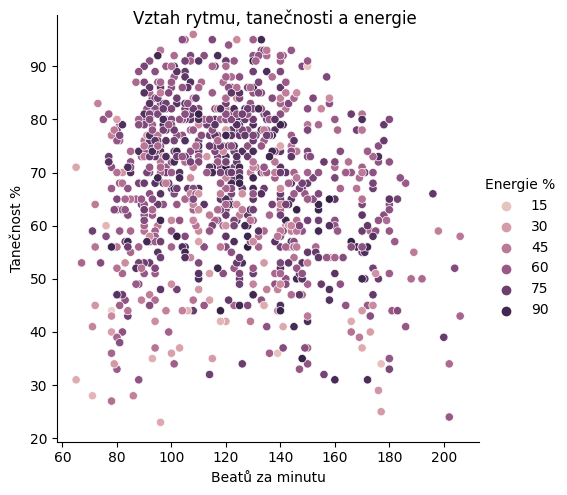

In [17]:
ax = sns.relplot(x='bpm', y ='danceability_%', hue="energy_%", data = df)

ax.set_xlabels("Beatů za minutu")
ax.set_ylabels("Tanečnost %")
ax._legend.set_title("Energie %")
ax.fig.suptitle("Vztah rytmu, tanečnosti a energie")


#### Graf 9 - Vztah rytmu a akustičnosti

Použitý graf: čárový (lineplot) 

Text(0.5, 1.0, 'Vztah rytmu a akustičnosti')

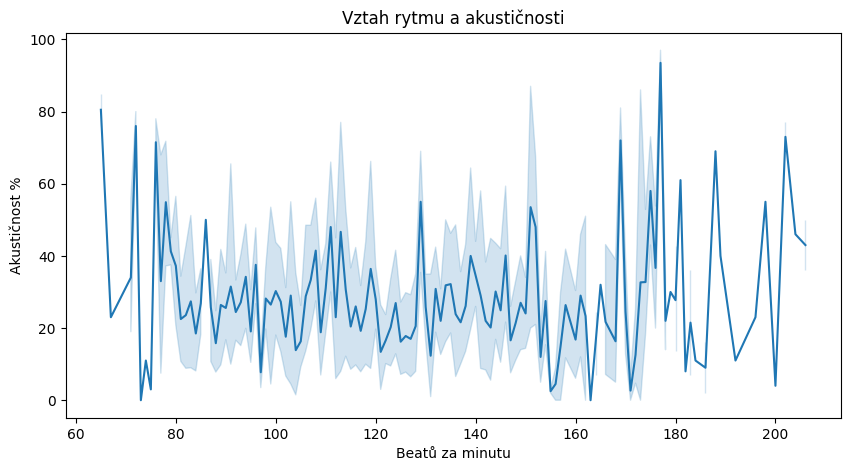

In [18]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax = sns.lineplot(x='bpm', y ='acousticness_%', data = df)

ax.set_xlabel("Beatů za minutu")
ax.set_ylabel("Akustičnost %")
ax.set_title("Vztah rytmu a akustičnosti")

#### Graf 10 - Rozložení hustoty vybraných atributů pomocí houslových grafů

Použitý graf: houslový (violinplot) 

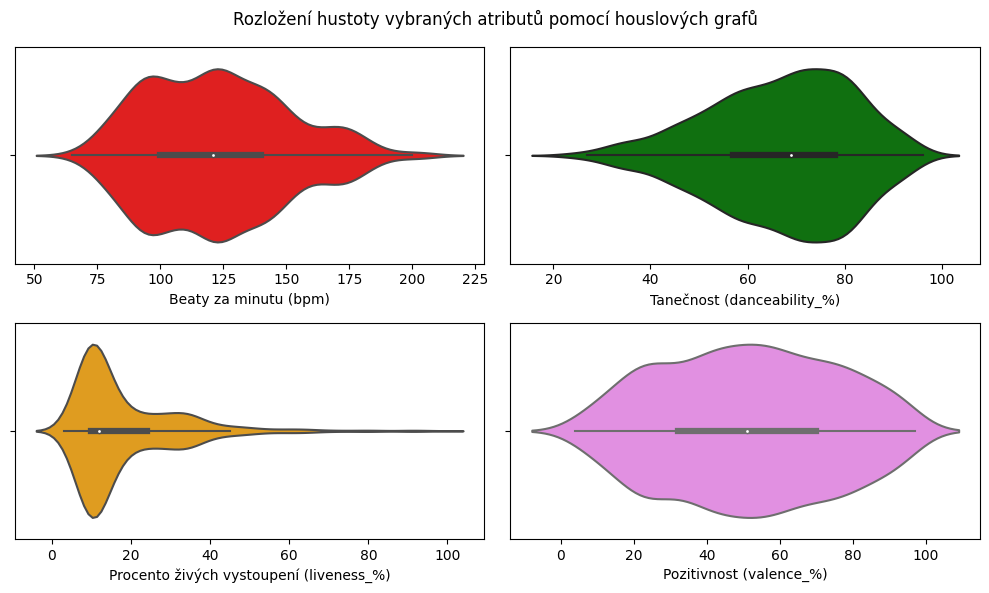

In [19]:
fig, ax = plt.subplots(2,2,figsize=(10,6))
cols = ["bpm", "danceability_%", "liveness_%", "valence_%"]
leg = ["Beaty za minutu (bpm)", "Tanečnost (danceability_%)", "Procento živých vystoupení (liveness_%)", "Pozitivnost (valence_%)"]
colors = ["r", "g", "orange", "violet"]

for i in range(2):
    for j in range(2):
        sns.violinplot(x=num_df[cols[i*2 + j]], ax=ax[i,j], color=colors[i*2+j])
        ax[i,j].set_xlabel(leg[i*2+j])

fig.suptitle("Rozložení hustoty vybraných atributů pomocí houslových grafů")
plt.tight_layout()



#### Graf 11 - Nejpozitivnější písničky

Použitý graf: sloupcový (barplot) 

[Text(0, 0, '97 %'),
 Text(0, 0, '97 %'),
 Text(0, 0, '97 %'),
 Text(0, 0, '97 %'),
 Text(0, 0, '97 %'),
 Text(0, 0, '96 %'),
 Text(0, 0, '96 %'),
 Text(0, 0, '96 %'),
 Text(0, 0, '96 %'),
 Text(0, 0, '96 %'),
 Text(0, 0, '96 %'),
 Text(0, 0, '96 %'),
 Text(0, 0, '96 %'),
 Text(0, 0, '96 %'),
 Text(0, 0, '96 %'),
 Text(0, 0, '96 %'),
 Text(0, 0, '96 %'),
 Text(0, 0, '96 %'),
 Text(0, 0, '95 %'),
 Text(0, 0, '94 %'),
 Text(0, 0, '94 %'),
 Text(0, 0, '94 %'),
 Text(0, 0, '94 %'),
 Text(0, 0, '93 %'),
 Text(0, 0, '93 %')]

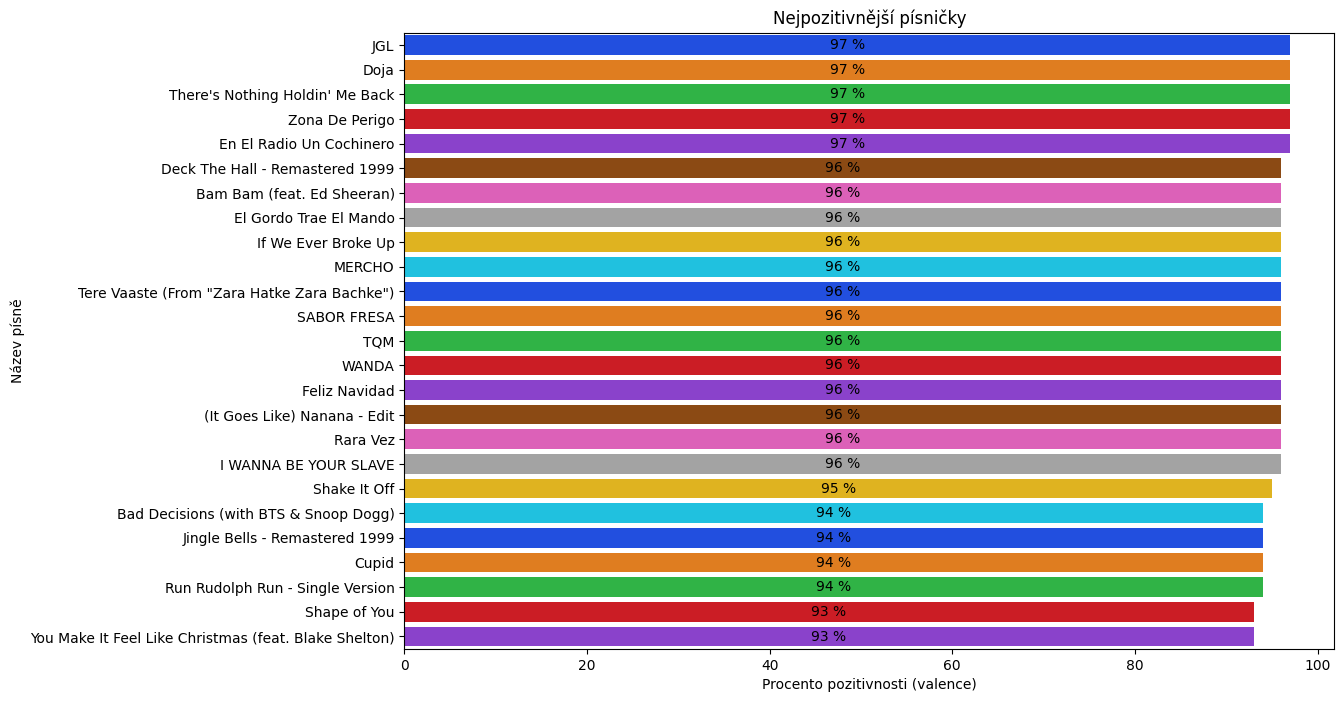

In [20]:
fig, ax = plt.subplots(figsize=(12,8)) 
top_streams = df.sort_values(by="valence_%", ascending=False).head(25)

ax = sns.barplot(x="valence_%", y="track_name", data = top_streams, ax=ax, palette="bright")

ax.set_ylabel("Název písně")
ax.set_xlabel("Procento pozitivnosti (valence)")
ax.set_title("Nejpozitivnější písničky")

ax.bar_label(ax.containers[0], labels = [f'{int(x.get_width())} %' for x in ax.containers[0]] , label_type="center")

#### Graf 12 - Párový graf procentuálních atributů

Použitý graf: párový (pairplot) 

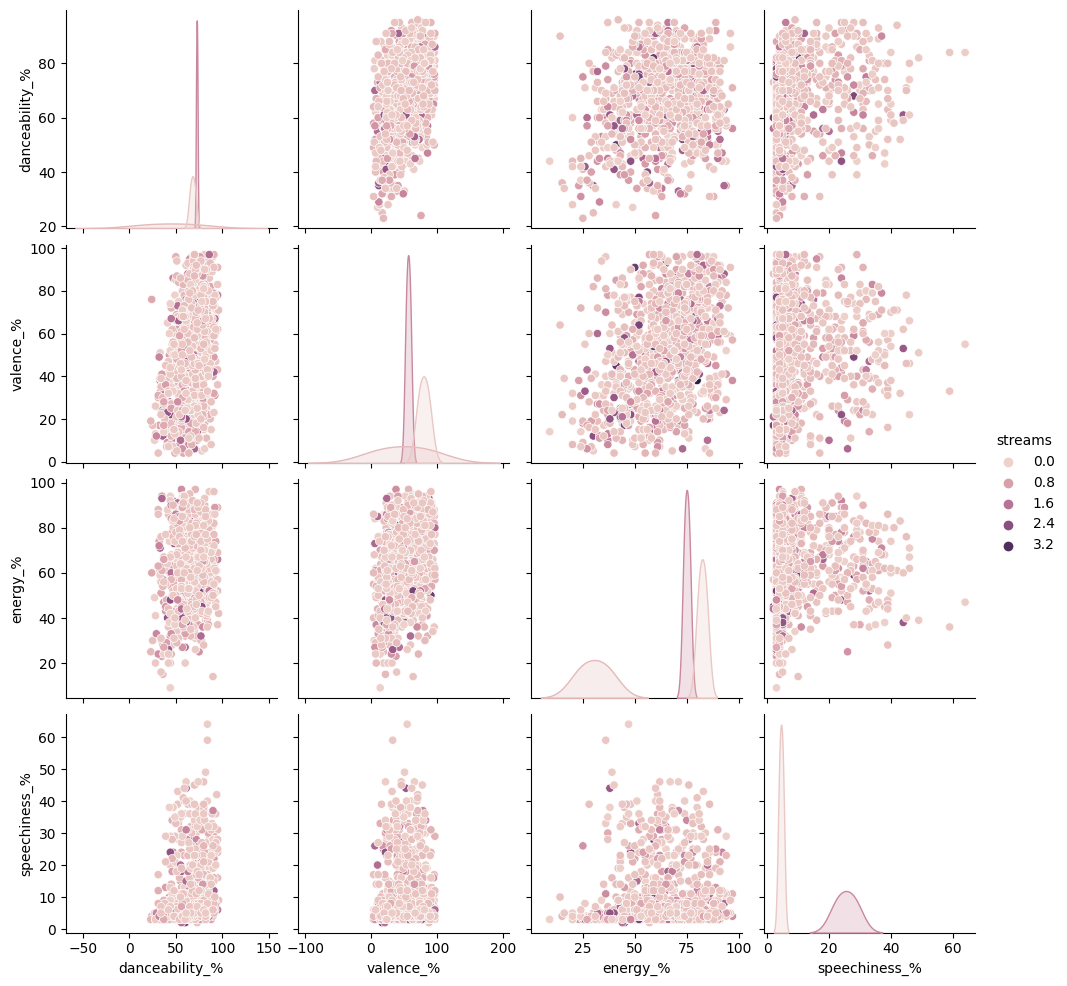

In [21]:
df_pairs = df.loc[:, ["danceability_%", "valence_%", "energy_%", "speechiness_%", "streams"]]

sns.pairplot(data=df_pairs, hue="streams")

### Detekce odlehlých hodnot

V této sekci byly hledány outliers. Bylo využito 2 způsobů detekce: pomocí mezikvartilové rozsahu (IQR) a pomocí vizualizace atributů a následného čtení z grafů.

In [29]:
# detekce odlehlých hodnot pomocí IQR
for col in num_df.columns:
    # výpočet mezikvartilového rozsahu (IQR)
    Q1 = num_df[col].quantile(0.25)
    Q3 = num_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # outlier - vytvoření True False masky
    outliers = (num_df[col] < (Q1 - 1.5 * IQR)) | (num_df[col] > (Q3 + 1.5 * IQR))

    print(f"Odlehlé hodnoty atributu {col}:")
    print(num_df.loc[outliers, col].to_list())

Odlehlé hodnoty atributu artist_count:
[8, 4, 5, 4, 4, 4, 5, 5, 5, 4, 6, 6, 4, 4, 7, 4, 4, 4, 8, 7, 4, 6, 4, 4, 5, 4, 4]
Odlehlé hodnoty atributu released_year:
[2013, 2014, 2014, 2016, 2016, 2012, 1999, 2012, 2008, 1975, 2015, 2012, 2011, 2012, 2004, 2011, 2012, 1985, 2014, 2011, 2011, 2007, 2002, 2016, 2004, 2010, 2012, 2013, 2004, 2016, 2010, 2010, 1983, 2015, 2011, 2012, 2013, 2012, 2016, 2014, 2013, 2014, 1992, 2016, 2010, 2013, 1968, 2010, 1984, 2016, 2000, 1997, 2014, 2002, 2002, 1995, 2014, 2016, 2015, 2003, 2011, 2000, 2016, 2016, 2015, 2014, 2014, 2015, 1985, 1973, 1930, 2012, 1994, 1984, 1958, 1957, 2011, 2013, 1963, 1959, 2013, 1970, 2011, 2011, 1963, 1971, 1952, 1946, 1979, 1984, 1984, 1950, 1942, 1986, 1963, 1958, 2000, 1959, 2005, 1958, 1957, 1970, 2015, 2015, 2010, 2016, 2016, 2010, 2014, 2013, 1991, 2003, 2002, 1999, 1999, 2012, 2002, 2013, 2016, 1995, 1999, 1999, 2015, 2014, 1991, 2004, 2013, 1975, 2013, 2016, 2011, 2015, 2015, 1996, 2016, 2013, 2014, 2015, 2016, 1998

Detekce outliers pomocí krabicových (boxplot) grafů

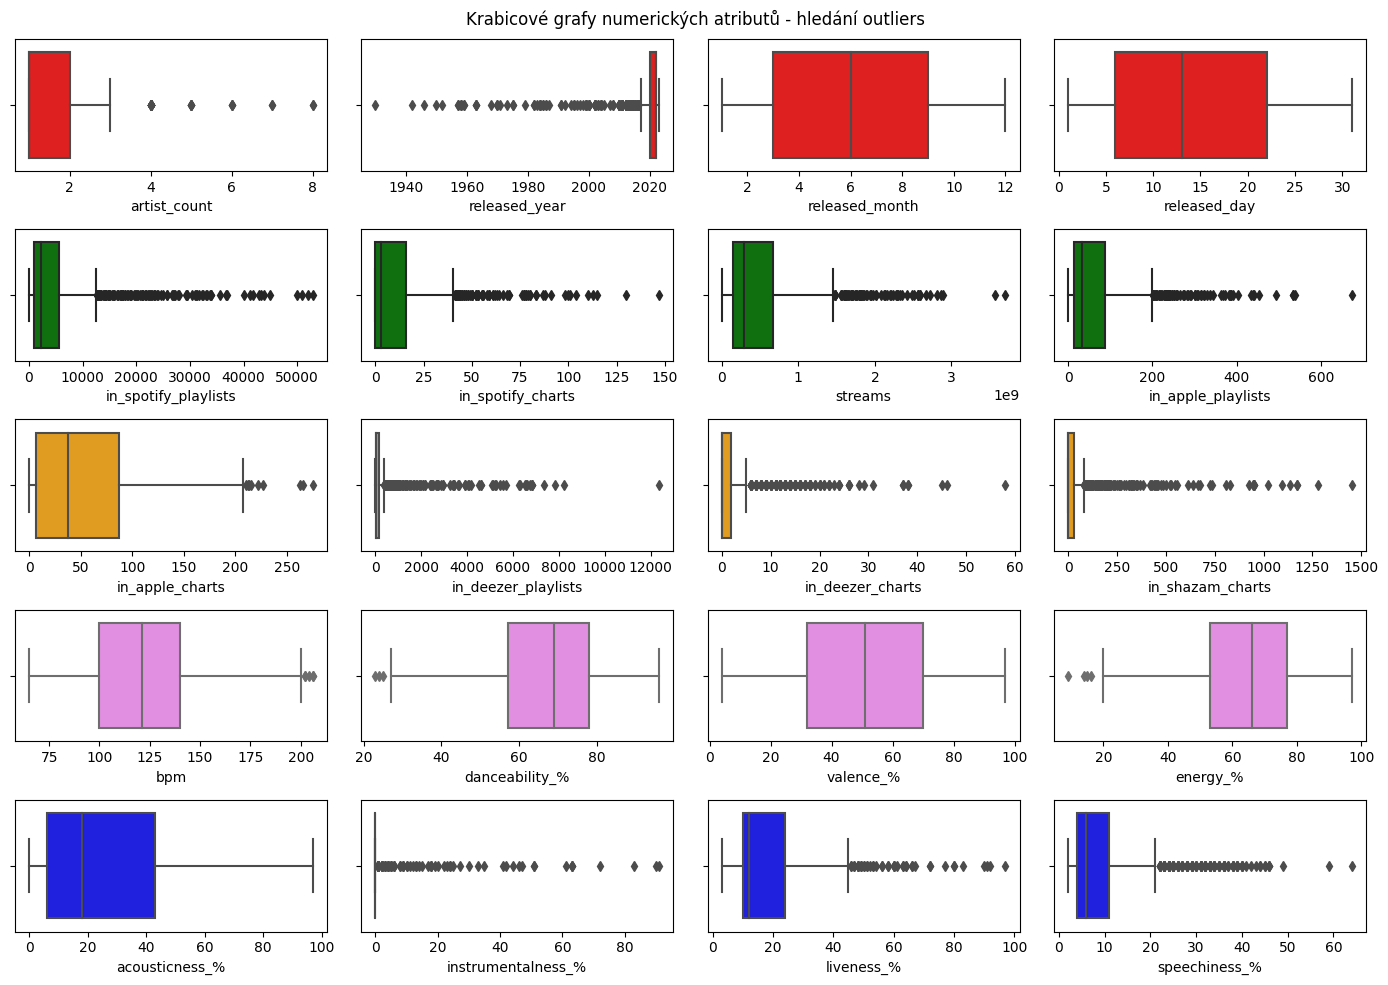

In [30]:
fig, ax = plt.subplots(5, 4, figsize=(14,10))
cols = num_df.columns
colors = ["r", "g", "orange", "violet", "b"]
for i in range(5):
    for j in range(4):
        sns.boxplot(x=num_df[cols[i*4 + j]], ax=ax[i,j], color=colors[i])

fig.suptitle("Krabicové grafy numerických atributů - hledání outliers")
plt.tight_layout()

### Detekce chybějících hodnot

Celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami

In [34]:
df_e = pd.read_csv("spotify-2023.csv", delimiter=",", encoding="ISO-8859-1") # znovu načtení datasetu abychom se zabvili oprav ze začátku
df_e.isnull().sum() # chybějící hodnoty podle atributů

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [35]:
df_e.isnull().sum().sum() # počet chybějících hodnot celkem

145

### Korelační analýza

Korelační analýza numerických atributů (grafy i korelační koeficienty)

In [25]:
# vytvoření korelační matice
cm = num_df.corr()
cm

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.087586,0.037995,-0.017549,-0.101966,-0.018507,-0.135783,-0.051074,-0.088597,-0.071506,-0.003732,-0.012823,-0.038375,0.207027,0.127960,0.137096,-0.101061,-0.050225,0.042730,0.119900
released_year,0.087586,1.000000,0.076714,0.174282,-0.392204,0.069678,-0.224273,-0.198998,-0.035842,-0.306812,0.095389,0.024640,-0.005334,0.187333,-0.059355,0.095226,-0.124156,-0.014562,-0.005819,0.133819
released_month,0.037995,0.076714,1.000000,0.080313,-0.104757,-0.047623,-0.023556,-0.000164,-0.019064,-0.088004,-0.005286,-0.088964,-0.039252,-0.046403,-0.118571,-0.083710,0.054430,0.033985,-0.012348,0.039838
released_day,-0.017549,0.174282,0.080313,1.000000,-0.079669,0.021877,0.011921,0.026410,0.011086,-0.084558,0.073288,0.018552,-0.030177,0.048951,0.042779,0.050545,-0.005788,0.019280,0.001566,-0.015826
in_spotify_playlists,-0.101966,-0.392204,-0.104757,-0.079669,1.000000,0.164331,0.789725,0.708277,0.271317,0.826404,0.144342,0.057516,-0.019598,-0.106534,-0.021883,0.033808,-0.064421,-0.028134,-0.046695,-0.089722
in_spotify_charts,-0.018507,0.069678,-0.047623,0.021877,0.164331,1.000000,0.246251,0.233354,0.552232,0.088358,0.600205,0.569568,0.034713,0.030071,0.035531,0.081920,-0.054987,-0.010146,-0.047552,-0.081765
streams,-0.135783,-0.224273,-0.023556,0.011921,0.789725,0.246251,1.000000,0.772155,0.320896,0.598125,0.228897,-0.006086,-0.002011,-0.104451,-0.041749,-0.026311,-0.003746,-0.044703,-0.048232,-0.111568
in_apple_playlists,-0.051074,-0.198998,-0.000164,0.026410,0.708277,0.233354,0.772155,1.000000,0.414523,0.472109,0.369032,0.100068,0.023725,-0.025326,0.057075,0.052615,-0.061781,-0.057219,-0.049596,-0.108011
in_apple_charts,-0.088597,-0.035842,-0.019064,0.011086,0.271317,0.552232,0.320896,0.414523,1.000000,0.173542,0.383668,0.401411,0.030962,-0.025204,0.047733,0.104828,-0.076793,-0.013145,-0.018733,-0.151539
in_deezer_playlists,-0.071506,-0.306812,-0.088004,-0.084558,0.826404,0.088358,0.598125,0.472109,0.173542,1.000000,0.066593,0.065846,-0.035395,-0.071489,-0.013859,0.064865,-0.063282,-0.016973,-0.026743,-0.062274


#### Korelační matice ve formě grafu

Matice popisuje jednotlivé hodnoty korelace mezi všemi numerickými atributy

Text(0.5, 1.0, 'Korelační matice')

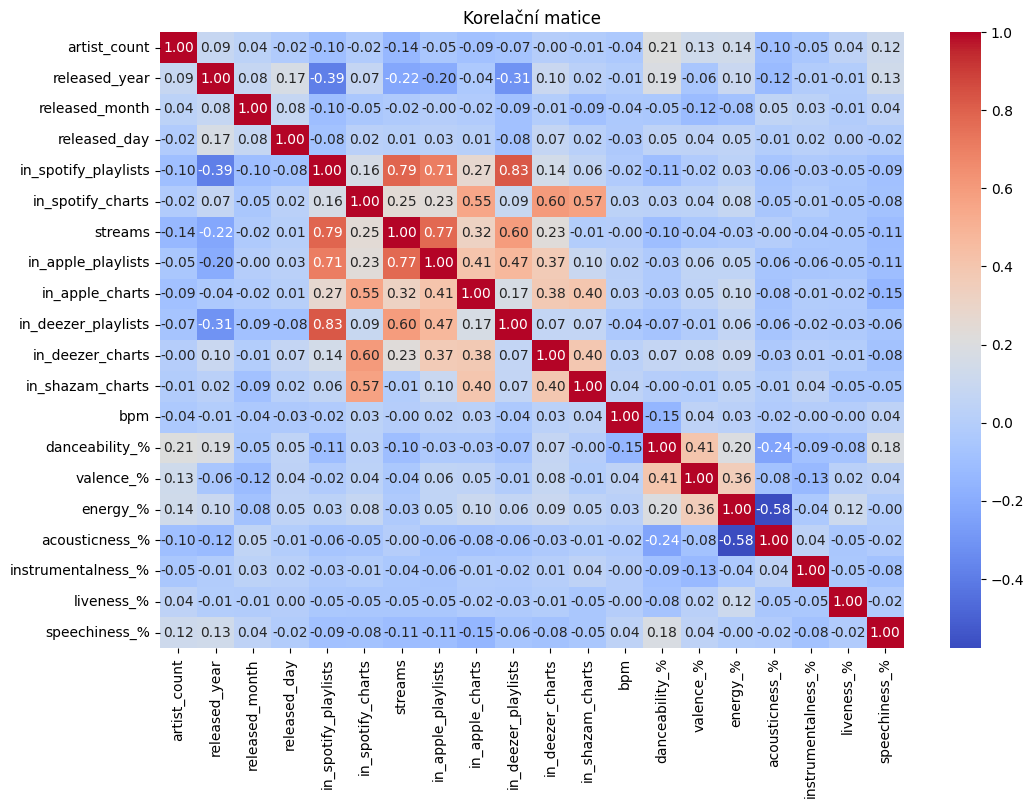

In [26]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Korelační matice")